## 1. Import Dataset

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!touch ~/.kaggle/kaggle.json

In [4]:
api_token = {"username": "siqilai", "key": "331f189b068a7c11368ec73df9f8906a"}

In [6]:
import json 

with open('.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100%|██████████████████████████████████████▊| 2.28G/2.29G [00:17<00:00, 130MB/s]
100%|███████████████████████████████████████| 2.29G/2.29G [00:17<00:00, 139MB/s]


In [9]:
import zipfile
with zipfile.ZipFile('./chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

## 2. EDA

In [1]:
import glob
import random
import matplotlib.pyplot as plt

def get_random_image(dir, condition):
    placeholder = ''
    if condition == 'n':
        placeholder = 'NORMAL'
    elif condition == 'p':
        placeholder = 'PNEUMONIA'
    else:
        raise Exception("Sorry, invalid condition")

    folder = f'./data/chest_xray/{dir}/{placeholder}/*.jpeg'
    img_paths = glob.glob(folder)
    max_length = len(img_paths)
    randomNumber = random.randint(0, max_length)
    for index, item in enumerate(img_paths, start=1):
        if index == randomNumber:
            print(index, item)
            image = plt.imread(item)
            readyImage = plt.imshow(image)
            return readyImage

8 ./data/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg


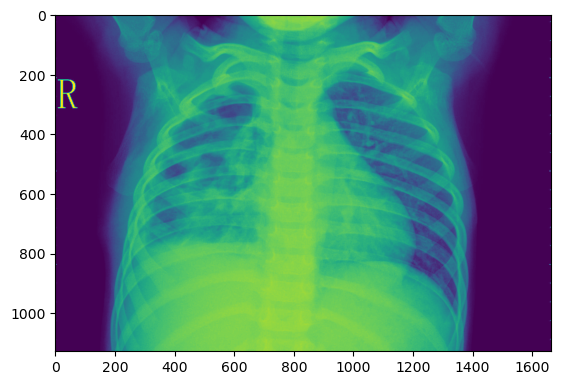

In [2]:
get_random_image("val", "p")

1. Grayscale Images: The actual chest X-ray images are in grayscale (black and white), but when using certain libraries like Matplotlib to open or save these images, they may appear with a default color map (e.g., "viridis"), showing weird color encodings like dark purple to light yellow.

2. Color Map in Matplotlib: Matplotlib uses a default color map (e.g., viridis) for visualizing images, which can result in incorrect color representation when working with grayscale images. This color map assigns different colors based on intensity values.

3. Why Grayscale Matters: If you train a model on images with the wrong color encoding (like viridis), it will learn features based on that color mapping, which doesn't correspond to actual chest X-rays. This will lead to poor performance when the model encounters real grayscale X-rays.

4. Solution: To ensure your model learns correctly, you need to save and train on images in their proper grayscale format, as that's how real chest X-rays are encoded.

In [3]:
from PIL import Image

image = Image.open('data/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg')  
print(image.format)
print(image.size)
print(image.mode)

JPEG
(1240, 1104)
L


Example shows a grayscale image with mode "L" (8-bit pixels, grayscale).

## 3. Resizing Image and EDA

In [4]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

# this path is a way to refer to all .jpeg files located in any subdirectory of the train folder. 
folder = f'./data/chest_xray/train/*/*.jpeg'

counterPneu = 0
counterNormal = 0

img_paths = glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224, 224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_pneumonia' + str(counterPneu) + '.jpeg', arr=im,format='jpeg',cmap='gray')
        counterPneu += 1
    else:
        full_size_image=Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_normal' + str(counterNormal) + '.jpeg', arr=im,format='jpeg',cmap='gray')
        counterNormal += 1

In [5]:
folder = f'./data/chest_xray/test/*/*.jpeg'

counterPneu = 0
counterNormal = 0

img_paths = glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1

In [6]:
folder=f'./data/chest_xray/val/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1

In [4]:
import glob
import pandas as pd

folder = f'./data/chest_xray/*/*.jpeg'

category = []
filenames = []
condition_of_lung = []

all_files = glob.glob(folder)

for filename in all_files:
    if "train" in filename:
        if "pneumonia" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "test" in filename:
        if "pneumonia" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "val" in filename:
        if "pneumonia" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("normal")

all_data_df = pd.DataFrame({"dataset type": category, "x-ray result": condition_of_lung, "filename": filenames})

print(all_data_df.head())

  dataset type x-ray result                                  filename
0         test       normal  ./data/chest_xray/test/test_normal0.jpeg
1         test       normal  ./data/chest_xray/test/test_normal1.jpeg
2         test       normal  ./data/chest_xray/test/test_normal2.jpeg
3         test       normal  ./data/chest_xray/test/test_normal3.jpeg
4         test       normal  ./data/chest_xray/test/test_normal4.jpeg


/tmp/ipykernel_113/2441826928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="x-ray result", col="dataset type", kind="count", palette="ch:.55", data=all_data_df, legend=True)


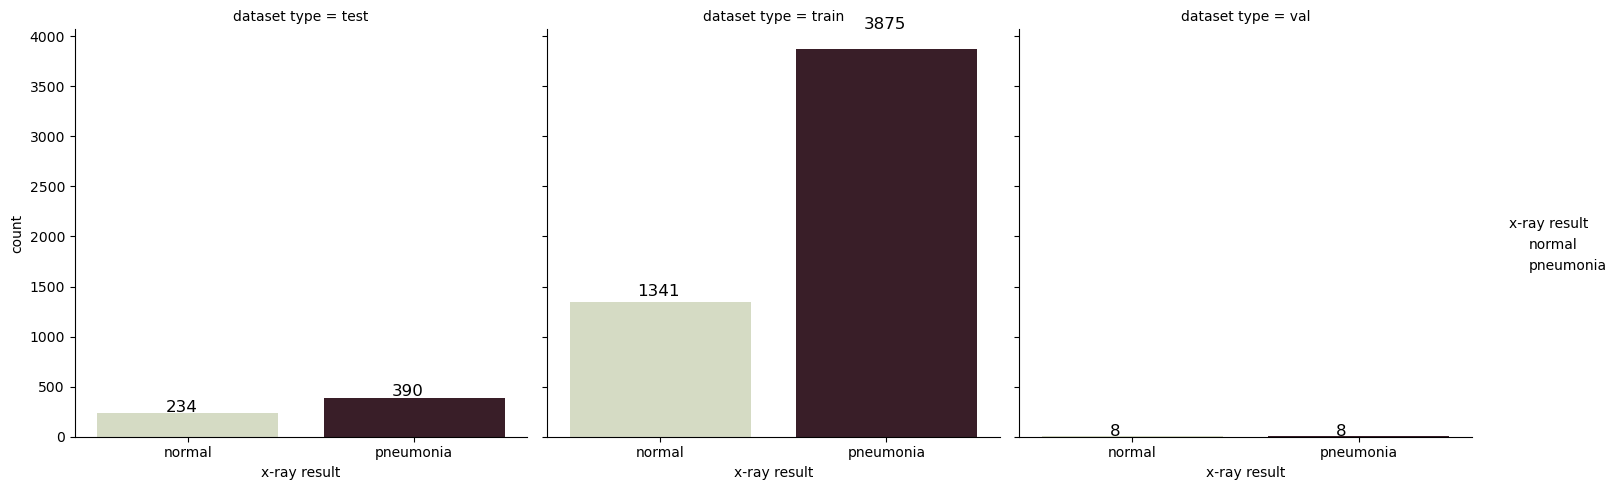

In [10]:
import seaborn as sns

g = sns.catplot(x="x-ray result", col="dataset type", kind="count", palette="ch:.55", data=all_data_df, legend=True)

for i in range(0, 3):
    ax = g.facet_axis(0, i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,
        p.get_height()*1.05,
        '{0:.0f}'.format(p.get_height()),
        color = 'black',
        rotation = 'horizontal',
        size = 'large')

Please continue with the second part.